## Tugas Computer Vision Face Recognition
### Muhammad Yusuf Ramadhan (23/517172/PA/22158)

### Preparasi

In [ ]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

#dataset sudah ada pada local


### Load Image dan Labels

In [3]:
def load_image(image_path):
  image = cv2.imread(image_path)
  print(image)
  if image is None:
    print('Error: Could not load image.')
    return None, None
  gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
  return image, gray

In [4]:
sample_image, sample_image_gray = load_image('C:/Users/LENOVO/Pictures/datasett/images/Muh_Yusuf_Ramadhan/ramo 2.jpg')

[[[ 85 100 116]
  [ 85 100 116]
  [ 87 100 116]
  ...
  [102 118 125]
  [ 89 105 112]
  [ 97 113 120]]

 [[ 89 103 121]
  [ 88 103 119]
  [ 88 103 119]
  ...
  [100 116 123]
  [ 89 105 112]
  [ 93 109 116]]

 [[ 92 107 126]
  [ 92 108 125]
  [ 91 107 124]
  ...
  [ 98 114 121]
  [ 89 105 112]
  [ 88 104 111]]

 ...

 [[229 233 222]
  [164 168 157]
  [132 136 125]
  ...
  [ 57  54  46]
  [ 58  55  47]
  [ 58  55  47]]

 [[237 243 232]
  [209 215 204]
  [142 146 135]
  ...
  [ 47  42  33]
  [ 49  44  35]
  [ 49  44  35]]

 [[250 255 247]
  [221 229 218]
  [154 158 147]
  ...
  [ 46  39  30]
  [ 43  36  27]
  [ 43  36  27]]]


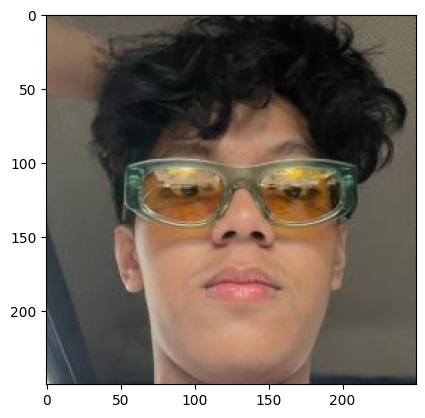

In [5]:
sample_image_rgb = cv2.cvtColor(sample_image, cv2.COLOR_BGR2RGB)
plt.imshow(sample_image_rgb)

In [6]:
dataset_dir = 'C:/Users/LENOVO/Pictures/datasett/images/'
images = []
labels = []
for root, dirs, files in os.walk(dataset_dir):
  if len(files) == 0:
    continue
  for f in files:
    _, image_gray = load_image(os.path.join(root, f))
    if image_gray is None:
      continue
    images.append(image_gray)
    labels.append(root.split('/')[-1])

[[[ 82  98 105]
  [ 81  97 104]
  [ 79  97 104]
  ...
  [ 23  31  31]
  [ 26  32  31]
  [ 26  32  31]]

 [[ 86 101 110]
  [ 85 101 108]
  [ 83 100 109]
  ...
  [ 24  32  32]
  [ 24  30  29]
  [ 24  30  29]]

 [[ 90 104 116]
  [ 90 105 114]
  [ 88 104 116]
  ...
  [ 25  33  33]
  [ 24  30  29]
  [ 24  30  29]]

 ...

 [[ 54  51  43]
  [ 54  51  43]
  [ 53  50  42]
  ...
  [ 44  41  36]
  [ 44  41  36]
  [ 44  41  36]]

 [[ 52  49  41]
  [ 52  49  41]
  [ 52  49  41]
  ...
  [ 45  42  37]
  [ 44  41  36]
  [ 44  41  36]]

 [[ 52  49  41]
  [ 52  49  41]
  [ 52  49  41]
  ...
  [ 45  42  37]
  [ 44  41  36]
  [ 44  41  36]]]
[[[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 ...

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0

In [7]:
len(labels)

60

### Face Detection

In [8]:
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades +'haarcascade_frontalface_default.xml')

In [9]:
def detect_faces(image_gray, scale_factor=1.1, min_neighbors=5,
min_size=(30, 30)):
  faces = face_cascade.detectMultiScale(
      image_gray,
      scaleFactor=scale_factor,
      minNeighbors=min_neighbors,
      minSize=min_size
  )
  return faces

In [10]:
sample_faces = detect_faces(sample_image_gray)

### Cropping Faces

In [11]:
def crop_faces(image_gray, faces, return_all=False):
  cropped_faces = []
  selected_faces = []
  if len(faces) > 0:
    if return_all:
      for x, y, w, h in faces:
        selected_faces.append((x, y, w, h))
        cropped_faces.append(image_gray[y:y+h, x:x+w])
    else:
      x, y, w, h = max(faces, key=lambda rect: rect[2] * rect[3])
      selected_faces.append((x, y, w, h))
      cropped_faces.append(image_gray[y:y+h, x:x+w])
  return cropped_faces, selected_faces

In [12]:
cropped_faces, _ = crop_faces(sample_image_gray, sample_faces)

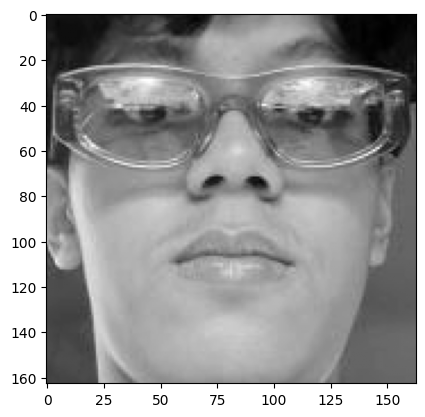

In [13]:
plt.imshow(cropped_faces[0], cmap='gray')

### Mengukur ulang dan Menggepengkan Muka

In [34]:
face_size = (250, 250)

def resize_and_flatten(face):
    face_resized = cv2.resize(face, face_size)
    face_flattened = face_resized.flatten()
    return face_flattened

### Persiapan Pelatihan dan Pengujian Data

In [35]:
X = []
y = []

for image, label in zip(images, labels):
  faces = detect_faces(image)
  cropped_faces, _ = crop_faces(image, faces)
  if len(cropped_faces) > 0:
    face_flattened = resize_and_flatten(cropped_faces[0])
    X.append(face_flattened)
    y.append(label)

X = np.array(X)
y = np.array(y)

In [36]:
X.shape

(58, 62500)

In [37]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3, random_state=177, stratify=y)

### Mean Centering

In [38]:
from sklearn.base import BaseEstimator, TransformerMixin
class MeanCentering(BaseEstimator, TransformerMixin):
  def fit(self, X, y=None):
    self.mean_face = np.mean(X, axis=0)
    return self
  def transform(self, X):
    return X - self.mean_face

### Ekstraksi Eigenfaces dan Membuat Classifier

In [39]:
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.decomposition import PCA

pipe = Pipeline([
    ('centering', MeanCentering()),
    ('pca', PCA(svd_solver='randomized', whiten=True, random_state=177)),
    ('svc', SVC(kernel='linear', random_state=177))
])

### Melatih dan Menampilkan Evaluasi Model

In [40]:
from sklearn.metrics import classification_report
pipe.fit(X_train, y_train)

y_pred = pipe.predict(X_test)
print(classification_report(y_test, y_pred))

                    precision    recall  f1-score   support

     George_W_Bush       0.67      0.67      0.67         3
        Laura_Bush       0.60      1.00      0.75         3
Muh_Yusuf_Ramadhan       1.00      0.33      0.50         3
  Olajide_Olatunji       0.00      0.00      0.00         3
   Serena_Williams       0.33      0.33      0.33         3
    Vladimir_Putin       0.50      1.00      0.67         3

          accuracy                           0.56        18
         macro avg       0.52      0.56      0.49        18
      weighted avg       0.52      0.56      0.49        18



C:\Users\LENOVO\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\LENOVO\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\LENOVO\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classific

### Visualisasi Eigenfaces

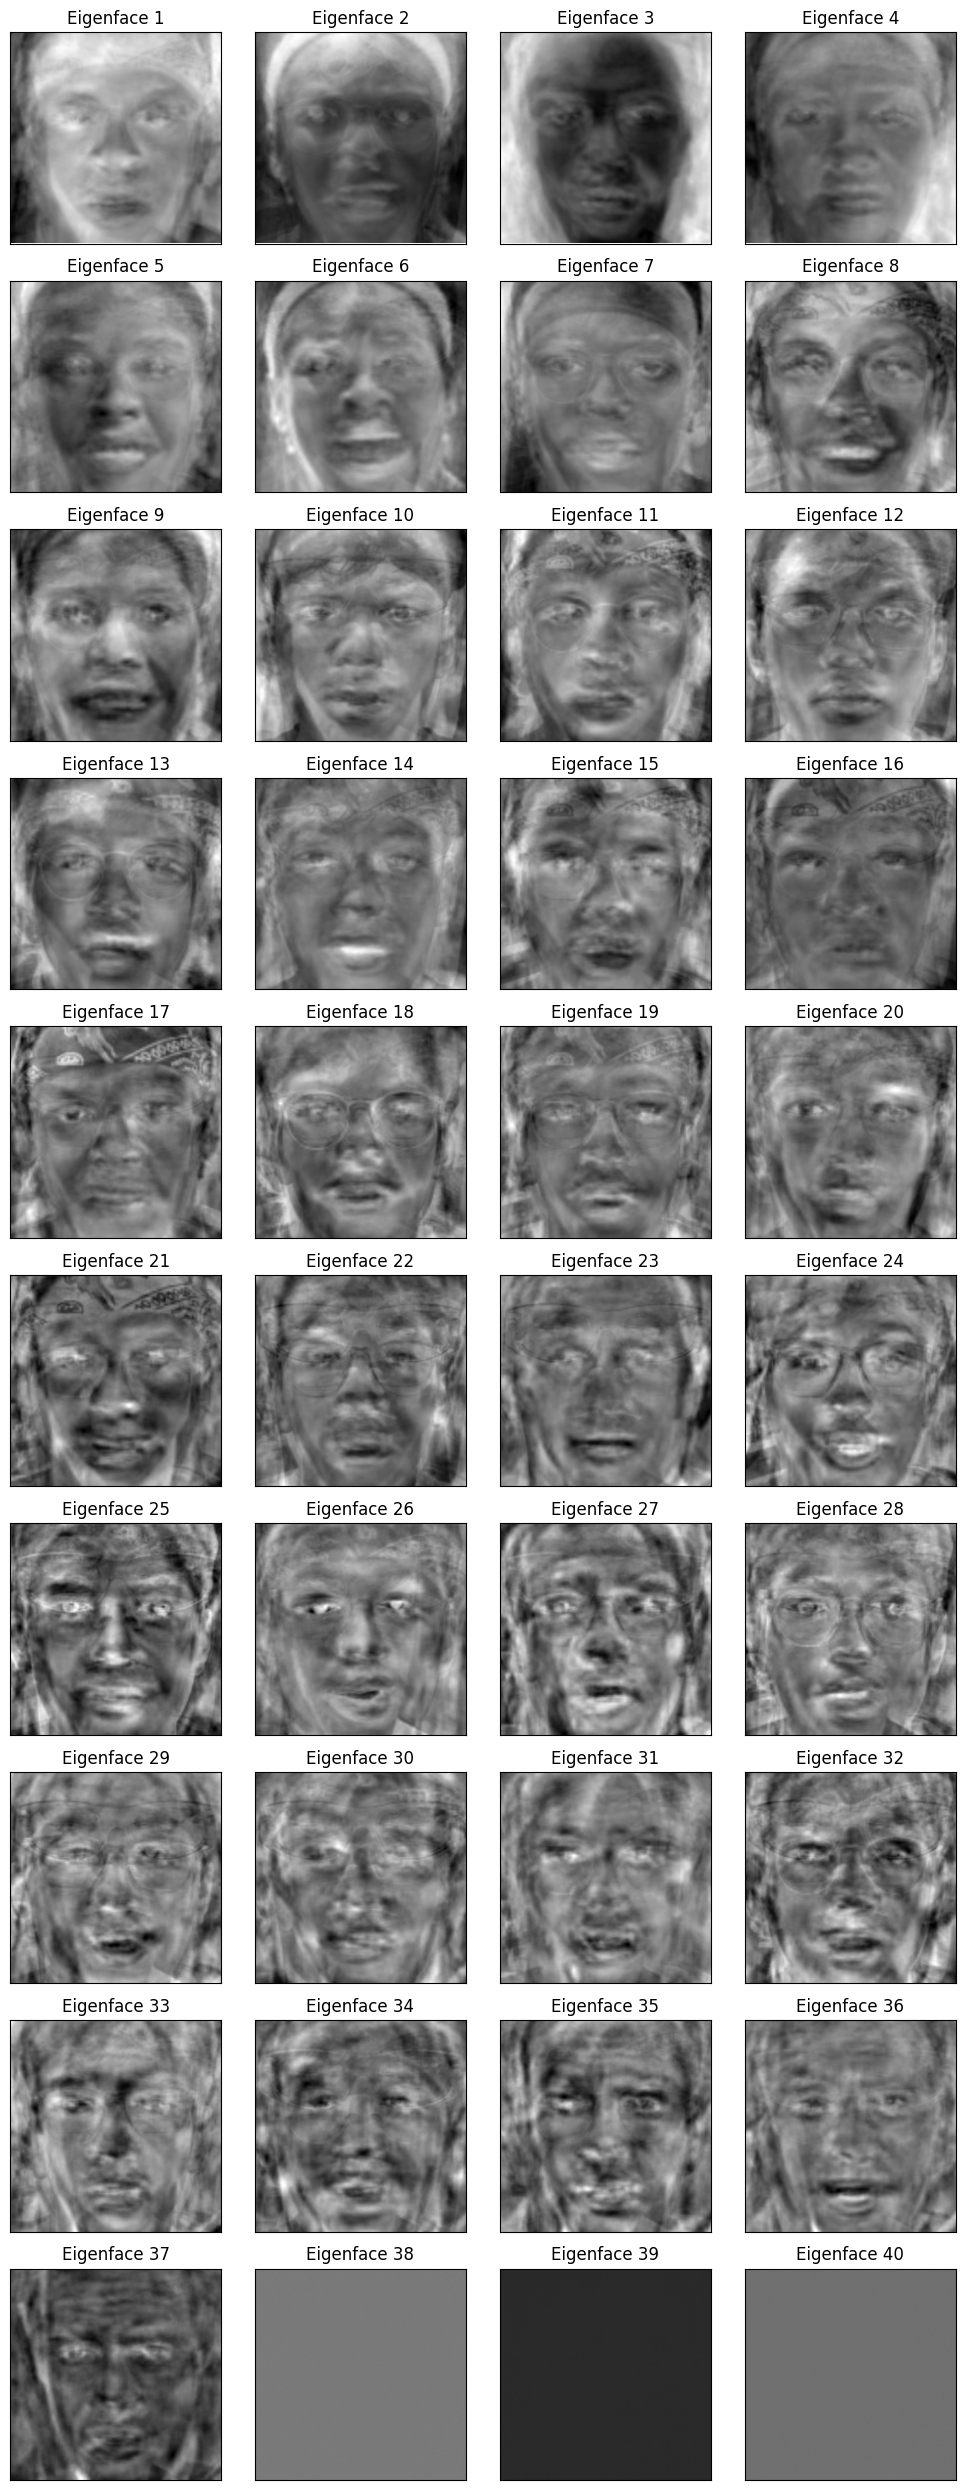

In [41]:
n_components = len(pipe[1].components_)
ncol = 4
nrow = (n_components + ncol - 1) // ncol
fig, axes = plt.subplots(nrow, ncol, figsize=(10, 2.5*nrow),
subplot_kw={'xticks':[], 'yticks':[]})
eigenfaces = pipe[1].components_.reshape((n_components,
X_train.shape[1]))
for i, ax in enumerate(axes.flat):
  try:
    ax.imshow(eigenfaces[i].reshape(face_size), cmap='gray')
    ax.set_title(f'Eigenface {i+1}')
  except:
    continue
plt.tight_layout()

### Simpan Model Pipeline dengan Pickle

In [42]:
import pickle

with open('eigenface_pipeline.pkl', 'wb') as f:
    pickle.dump(pipe, f)

### Gabung Semua Metode 

In [43]:
def get_eigenface_score(X):
  X_pca = pipe[:2].transform(X)
  eigenface_scores = np.max(pipe[2].decision_function(X_pca), axis=1)
  return eigenface_scores

In [44]:
def eigenface_prediction(image_gray):
    faces = detect_faces(image_gray)
    cropped_faces, selected_faces = crop_faces(image_gray, faces)

    if len(cropped_faces) == 0:
      return [0], ['No face detected.'], []

    X_face = []
    for face in cropped_faces:
      face_flattened = resize_and_flatten(face)
      X_face.append(face_flattened)

    X_face = np.array(X_face)
    labels = pipe.predict(X_face)
    scores = get_eigenface_score(X_face)

    return scores, labels, selected_faces

In [45]:
sample_scores, sample_label, sample_faces = eigenface_prediction(sample_image_gray)

In [46]:
def draw_text(image, label, score,
              font=cv2.FONT_HERSHEY_SIMPLEX,
              pos=(0, 0),
              font_scale=0.6,
              font_thickness=2,
              text_color=(0, 0, 0),
              text_color_bg=(0, 255, 0)
              ):

  x, y = pos
  score_text = f'Score: {score:.2f}'
  (w1, h1), _ = cv2.getTextSize(score_text, font, font_scale,
                              font_thickness)
  (w2, h2), _ = cv2.getTextSize(label, font, font_scale,
                              font_thickness)
  cv2.rectangle(image, (x, y-h1-h2-25), (x + max(w1, w2)+20, y),
                 text_color_bg, -1)
  cv2.putText(image, label, (x+10, y-10), font, font_scale,
            text_color, font_thickness)
  cv2.putText(image, score_text, (x+10, y-h2-15), font, font_scale,
            text_color, font_thickness)

In [47]:
def draw_result(image, scores, labels, coords):
  result_image = image.copy()
  for (x, y, w, h), label, score in zip(coords, labels, scores):
    cv2.rectangle(result_image, (x, y), (x + w, y + h), (0, 255, 0),2)
    draw_text(result_image, label, score, pos=(x, y))
  return result_image

In [48]:
result_image = draw_result(sample_image, sample_scores, sample_label, sample_faces)

[[[196 205 214]
  [195 204 213]
  [195 204 213]
  ...
  [199 210 214]
  [197 208 212]
  [197 208 212]]

 [[195 204 213]
  [195 204 213]
  [194 203 212]
  ...
  [199 210 214]
  [198 209 213]
  [198 209 213]]

 [[195 204 213]
  [195 204 213]
  [194 203 212]
  ...
  [198 209 213]
  [200 211 215]
  [200 211 215]]

 ...

 [[ 50  45  44]
  [ 53  48  47]
  [ 52  47  46]
  ...
  [ 63  58  57]
  [ 64  59  58]
  [ 64  59  58]]

 [[ 56  51  50]
  [ 56  51  50]
  [ 52  47  46]
  ...
  [ 62  57  56]
  [ 61  56  55]
  [ 61  56  55]]

 [[ 56  51  50]
  [ 56  51  50]
  [ 52  47  46]
  ...
  [ 61  56  55]
  [ 61  56  55]
  [ 61  56  55]]]


[[[ 85 100 116]
  [ 85 100 116]
  [ 87 100 116]
  ...
  [102 118 125]
  [ 89 105 112]
  [ 97 113 120]]

 [[ 89 103 121]
  [ 88 103 119]
  [ 88 103 119]
  ...
  [100 116 123]
  [ 89 105 112]
  [ 93 109 116]]

 [[ 92 107 126]
  [ 92 108 125]
  [ 91 107 124]
  ...
  [ 98 114 121]
  [ 89 105 112]
  [ 88 104 111]]

 ...

 [[229 233 222]
  [164 168 157]
  [132 136 125]
  

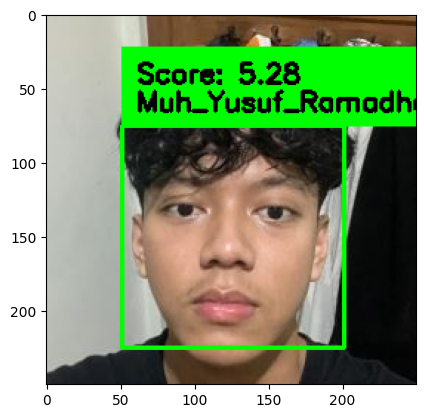

In [49]:
testresults = []
for i in range(3):
  temp, temp2 = load_image(os.path.join('C:/Users/LENOVO/Pictures/datasett/images/Muh_Yusuf_Ramadhan/' + 'ramo ' + f"{i+1}.jpg"))  # saya memberi nama file foto saya dengan nama ramo, karena ramo adalah nama panggilan saya
  temp3, temp4, temp5 = eigenface_prediction(temp2)
  testresults.append(draw_result(temp, temp3, temp4, temp5))
  testresultrgb = cv2.cvtColor(testresults[i], cv2.COLOR_BGR2RGB)
  plt.imshow(testresultrgb)
  print('\n')

Ujicoba Facecam

In [50]:
import cv2

def test_webcam():
    # Inisialisasi webcam
    cap = cv2.VideoCapture(0)
    
    while True:
        ret, frame = cap.read()
        if not ret:
            break
            
        # Konversi ke grayscale
        frame_gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        
        # Eigenface untuk deteksi wajah
        result = eigenface_prediction(frame_gray)
        if isinstance(result, str):
            print(result)
            continue
            
        scores, labels, faces = result
        
        # Gambar hasil deteksi dan prediksi
        result_frame = draw_result(frame, scores, labels, faces)
        
        # Menampilkan hasil
        cv2.imshow('Face Recognition', result_frame)
        
        # Keluar dari window dengan menekan tombol 'x'
        if cv2.waitKey(1) & 0xFF == ord('x'):
            break
    
    cap.release()
    cv2.destroyAllWindows()

test_webcam()